In [29]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.linear_model import Lars
from sklearn.linear_model import  SGDRegressor

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from IPython.display import Image


'''
I've turned off warnings here in this Jupyter Notebook,
'''
import warnings
warnings.filterwarnings("ignore")

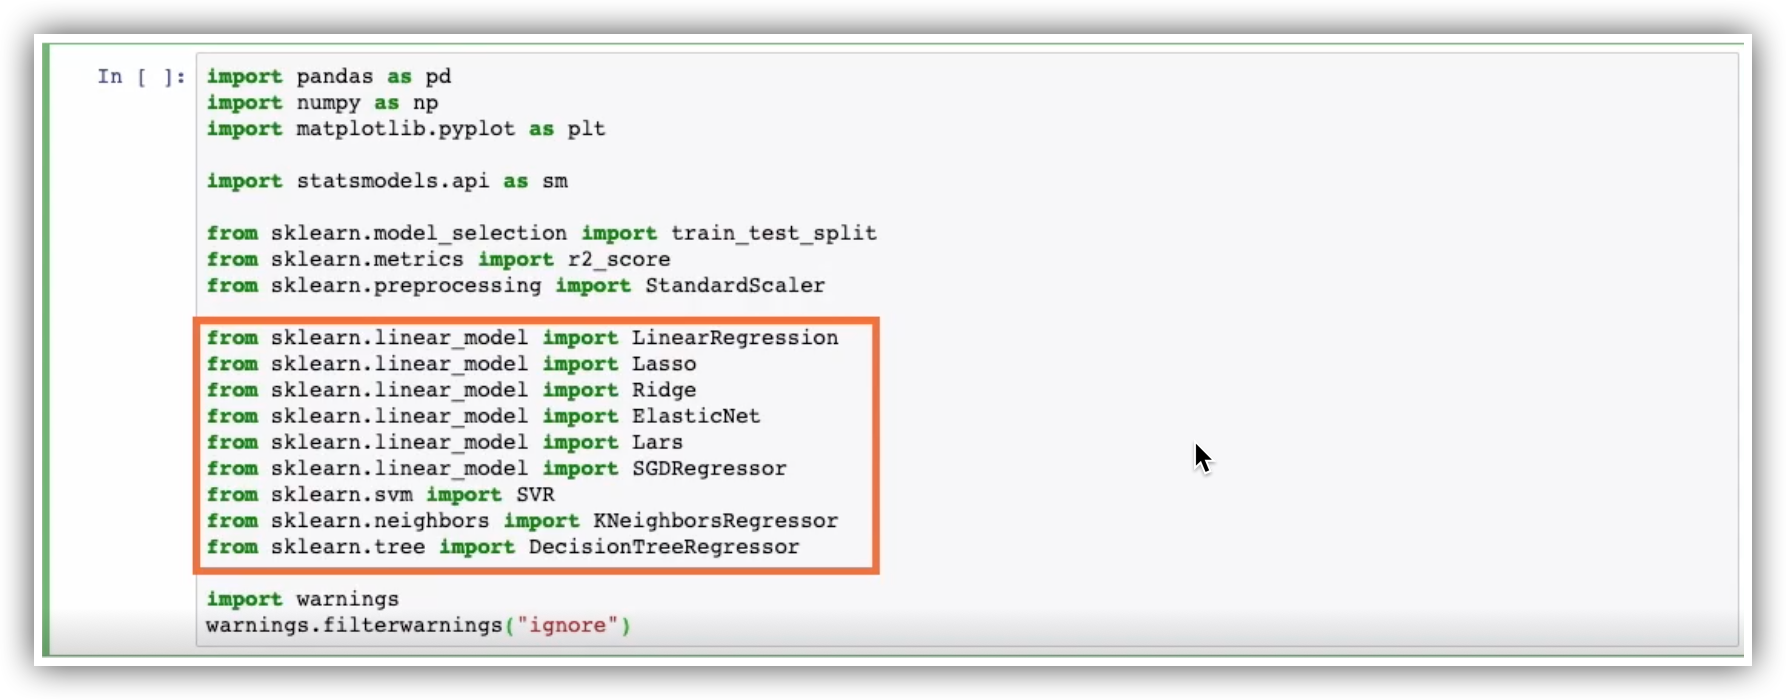

In [30]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-21_18-38-17.png')

In [31]:
'''
We'll build all of these models in the same notebook using a few helper
functions that we'll set up first.
'''
'''
Let's go ahead and use pandas to read in our dataset that has been cleaned and preprocessed earlier.
This is in the auto-mpg- processed.csv file. Here is what the dataset looks like,

We'll use all of the other features, cylinders, displacement, horsepower, and so on,
to predict the mileage for the cars.
'''

automobile_df =pd.read_csv('data/auto-mpg-processed.csv')
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
127,14.0,8,302.0,137,4042,14.5,48
192,31.0,4,76.0,52,1649,16.5,47
41,18.0,6,250.0,105,3459,16.0,46
48,23.0,4,115.0,95,2694,15.0,46
167,37.3,4,91.0,69,2130,14.7,42


In [32]:
'''
I'm going to instantiate a dictionary here called result_dict that will hold the
training and test scores from the different models that we build and train.

The keys will be meaningful names for the different models that we build and the
values will be their training and test R squares.

In this way, by simply doing the results stored in this dictionary,
we'll be able to compare different models.
'''
result_dict ={}

In [33]:
'''
I'm going to define a helper function here called build_model that will allow me to
build and train the different regression models.
'''
'''
:param regression_fn:
    :param name_of_y_col:
    :param names_of_x_cols:
    :param dataset:
    :param test_frac:
    :param preprocess_fn:
    :param show_plot_Y:
    :param show_plot_scatter:

 The first argument here is the regression function. This is a function that takes in a training
 data and corresponding target values. This will instantiate a particular ML regression model,
 whether it's a linear regression model, a lasso model, a ridge or an elastic net model, anything.
 And this function will train the model on our training data.

 The name of y_col input argument specifies the column name in our data frame for the target
 values that we should use for training.

 The names_of_x_cols is a list of feature columns. These are the columns that we want to
 include as features when we train our model.

 The dataset is the original data frame that contains the features, as well as our target values.

 The test_frac specifies how much of our dataset we should hold out to evaluate or measure our model,
 that is the fraction of our data that will be used as test data.

 If you want the data to be preprocessed in some way, standardized or scaled before you feed
 it into your regression model, you can specify a preprocessed function.
 By default, it's set to None.

 Set show_plot_Y to True if you want to display a plot of actual versus predict Y values,
 and set show_plot_scatter to true if you want to see how your regression line fits on the training data.


'''
def build_model(regression_fn,
                name_of_y_col,
                names_of_x_cols,
                dataset,
                test_frac=0.2,
                preprocess_fn=None,
                show_plot_Y=False,
                show_plot_scatter=False):

    '''
    Extract from the dataset the features that you want to train your model into the variable X
    and extract the target value into Y.
    '''
    X=dataset[names_of_x_cols]
    Y=dataset[name_of_y_col]

    '''
       If you've specified a function used to preprocess your model, apply this preprocessing
       function to your X values.
       The preprocessed features are stored once again in the X variable.
    '''
    if preprocess_fn is not None:
        X=preprocess_fn(X)

    '''
    Use scikit-learn's train_test_split function to split up your dataset into training and test data.
    '''
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
    '''
    Once you have your training data, pass in the training data, as well as the
    corresponding labels to the regression function.

    The regression function is a wrapper that will instantiate a particular regression model and
    train on the dataset you've specified.

    The regression function will return the fully trained ML model, which you can then use
    for prediction, and store your predicted values in y_pred.
    '''
    model= regression_fn(x_train,y_train)
    y_pred=model.predict(x_test)

    '''
    You can then print out the R square values on the training data, as well as the test data
    for your model.
    '''
    print("Training_score : " , model.score(x_train, y_train))
    print("Test_score : ", r2_score(y_test, y_pred))

    '''
    If you've invoked the build model function with show_plot_Y is equal to True, plot the
    actual values versus predicted values in the form of a line chart
    '''
    if show_plot_Y == True:
        fig, ax = plt.subplots(figsize=(12, 8))

        plt.plot(y_pred, label='Predicted')
        plt.plot(y_test.values, label='Actual')

        plt.ylabel(name_of_y_col)

        plt.legend()
        plt.show()

    '''
    if you've called it with show_plot_scatter equal to True, display a scatter plot in
    matplotlib with the original X and Y values of the test data and the predicted line.
    '''
    if show_plot_scatter == True:
        fig, ax = plt.subplots(figsize=(12, 8))

        plt.scatter(x_test, y_test)
        plt.plot(x_test, y_pred, 'r')

        plt.legend(['Predicted line','Observed data'])
        plt.show()

    '''
    we'll return from this build model function the training score and test R square
    score for this particular model.
    '''
    return {
        'training_score': model.score(x_train,y_train),
        'test_score': r2_score(y_test,y_pred)
    }



In [34]:
'''
This is the compare_results function. This is the function that will quickly print out the
training, as well as test scores for all of the regression models that we've built so far.

This function uses a for loop to iterate through all of the keys in our result dictionary
and then prints out the kind of regression that was performed, the training score,
as well as the test score.
'''
def compare_results():
    for key in result_dict:
        print('Regression: ', key)
        print('Training score', result_dict[key]['training_score'])
        print('Test score', result_dict[key]['test_score'])
        print()

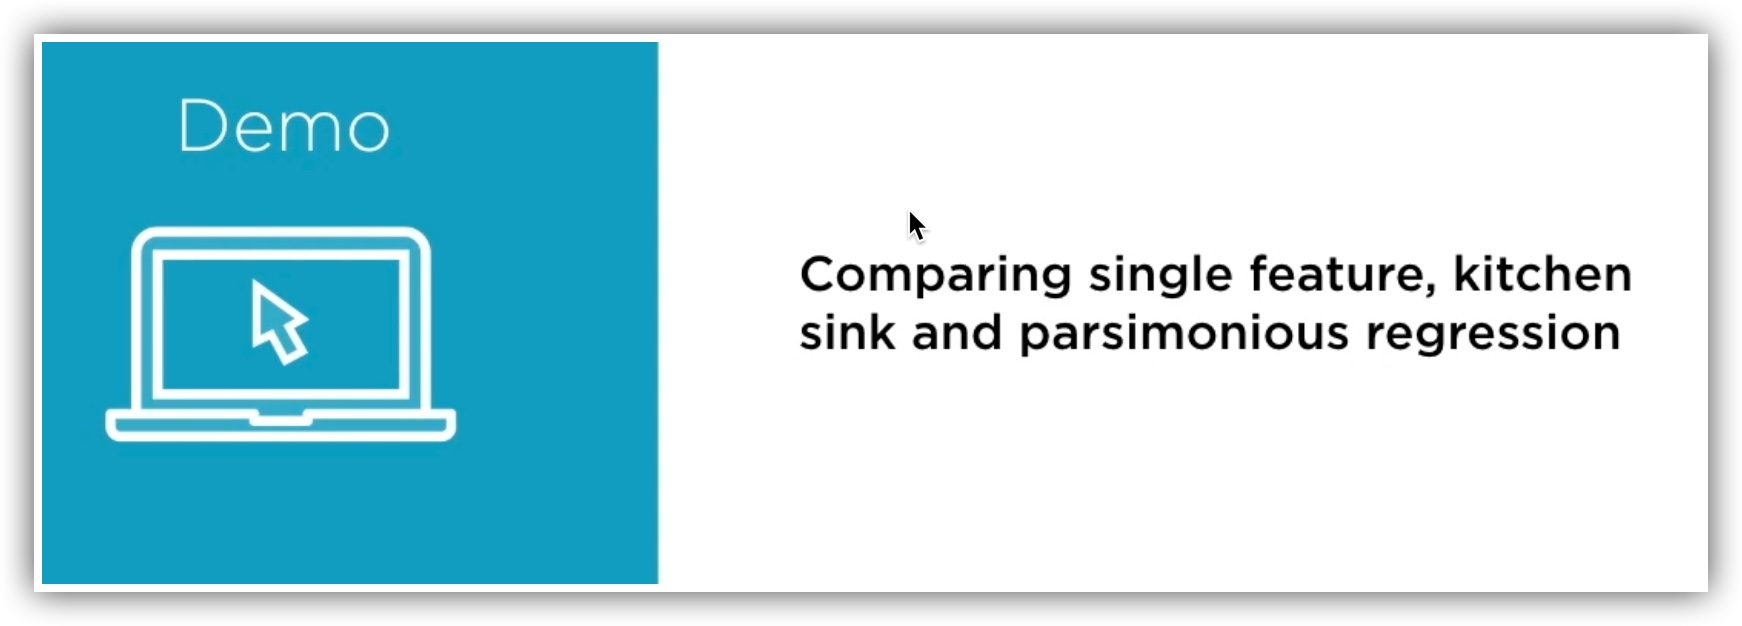

In [35]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-21_20-06-31.jpg')

In [36]:
'''
This linear_reg function takes in training data, x_train, and target values, y_train.

Within this function, we instantiate the LinearRegression estimator object with normalize is equal
to True and call model.fit on this training data.

Once the model has been trained, we return an instance of this fully-trained model
to the caller of this function.

This is the helper function that we'll pass in to build model
'''
def linear_reg(x_train,y_train):
    model=LinearRegression(normalize=True)
    model.fit(x_train,y_train)

    return model


Training_score :  0.6886465574759385
Test_score :  0.7022214608274017


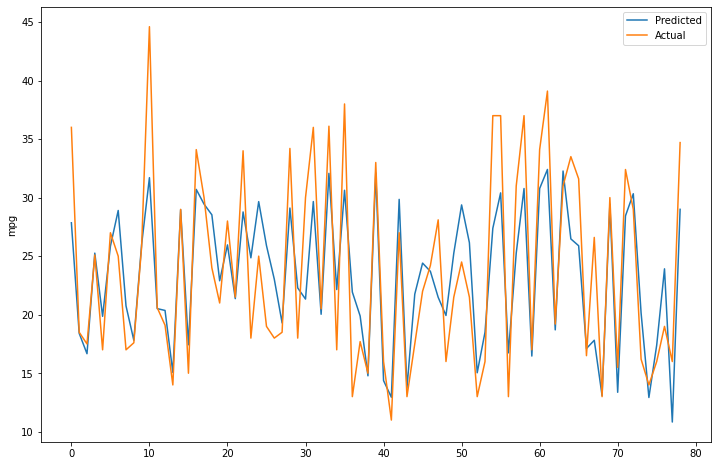

In [37]:
'''
 We invoke the build_model function that will train our regression model and calculate
 the training, as well as test scores and assign these results to the result dictionary object.

 We'll save the training and test score in the result dictionary with a meaningful key.

 So we have regressed to find the values of mpg, this is a single linear regression.
 Single linear, because we just use one feature for the regression,

 and let's take a look at build_model for this.

 The linear_reg function that we just defined is the first input argument,
 that is our regression function.

 The target value that we want to predict using this model is mpg,

 the input feature that we use to train the model is just one, that is the weight of the car,

 the original dataset is automobile_df,

 and we want to show Y values, actual versus predicted.

 Run Shift+Enter to build and train our linear regression model using our helper function,
 and here is the training and test scores for this model.

We also have a nice little line chart here with predicted values in blue and actual values in orange.
'''

result_dict ['mpg ~ single_linear'] =build_model(linear_reg,
                                                 'mpg',
                                                 ['weight'],
                                                 automobile_df,
                                                 show_plot_Y=True)

Training_score :  0.7118879455162679
Test_score :  0.6875259383256004


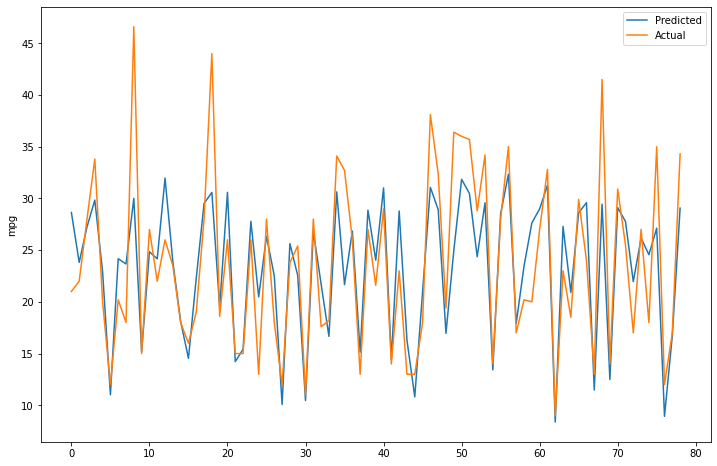

In [38]:
'''
Let's try this once again. This time we'll perform our kitchen sink linear regression with
all of the features as input.

The result of this regression will be present in the mpg - kitchen_sink_linear key,
and the features we use in our training data are cylinders, displacement,
horsepower, weight, and acceleration.

Our kitchen sink regression performed decently well this time around,
training score of 70%, test score of around the same.
'''
result_dict ['mpg - kitchen_sink_linear'] =build_model(linear_reg,
                                                 'mpg',
                                                       ['cylinders',
                                                        'displacement',
                                                        'horsepower',
                                                        'weight',
                                                        'acceleration'],
                                                 automobile_df,
                                                 show_plot_Y=True)

Training_score :  0.7044402283383003
Test_score :  0.7127802587822276


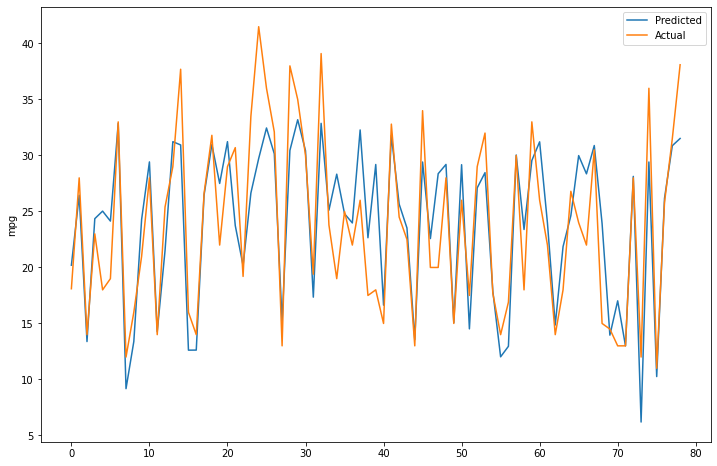

In [39]:
'''

But you don't really need to throw the kitchen sink at your linear regressor, you'll find
that a more parsimonious regression with a few selected features performs just as well.

Here is a parsimonious regression using the same linear regressor estimator object,
we'll only use the horsepower and weight features in our training data.

We've dropped the number of features down from five to two, but because these were the
most significant features, we see that the training score and test scores for our
regression are still high.
'''

result_dict ['mpg - parsimonious_linear'] =build_model(linear_reg,
                                                       'mpg',
                                                       [
                                                        'horsepower',
                                                        'weight',
                                                        ],
                                                       automobile_df,
                                                       show_plot_Y=True)

In [40]:
'''
let's compare results and here are all of the training and testing scores for all of the
regression models that we've just built and trained right here for you, set up side by side.

This one screen allows us to quickly compare how the different models have done.
'''
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6886465574759385
Test score 0.7022214608274017

Regression:  mpg - kitchen_sink_linear
Training score 0.7118879455162679
Test score 0.6875259383256004

Regression:  mpg - parsimonious_linear
Training score 0.7044402283383003
Test score 0.7127802587822276



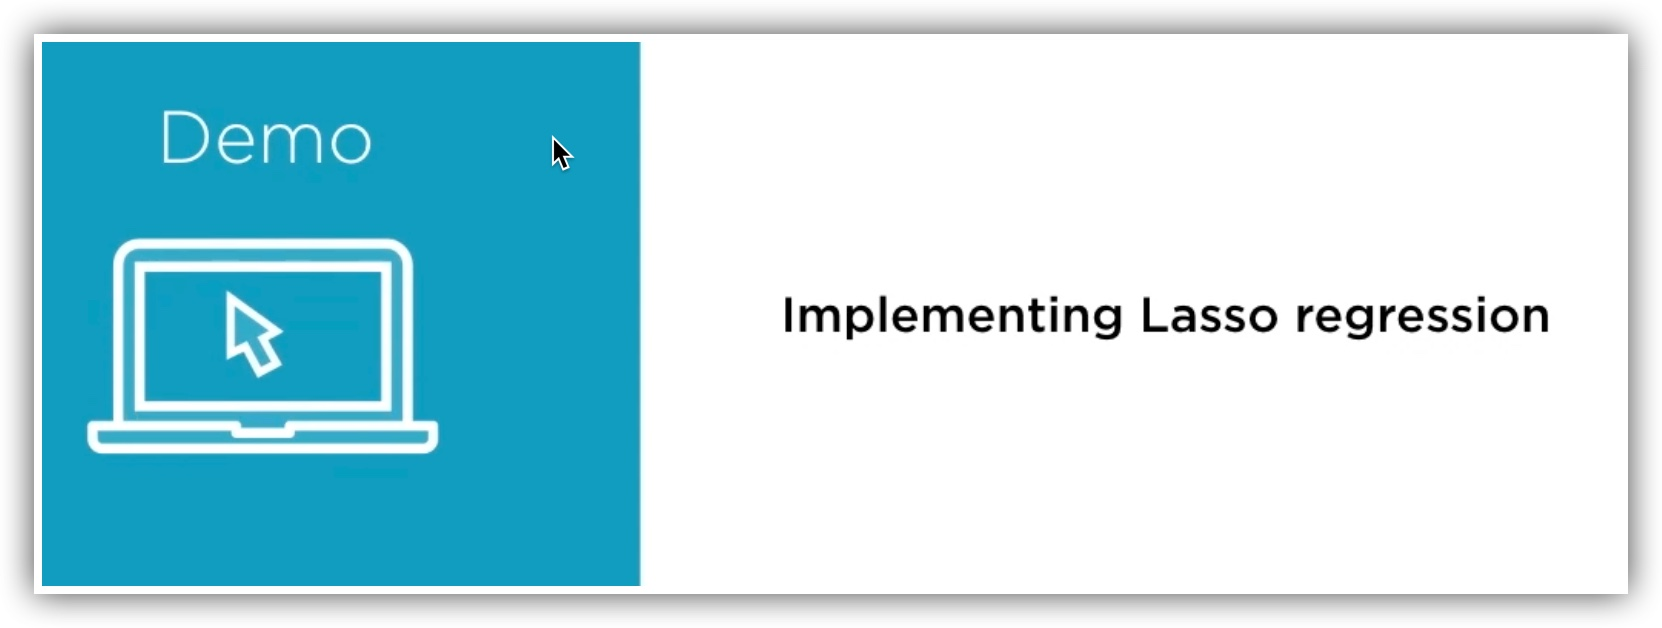

In [41]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-21_20-26-07.jpg')

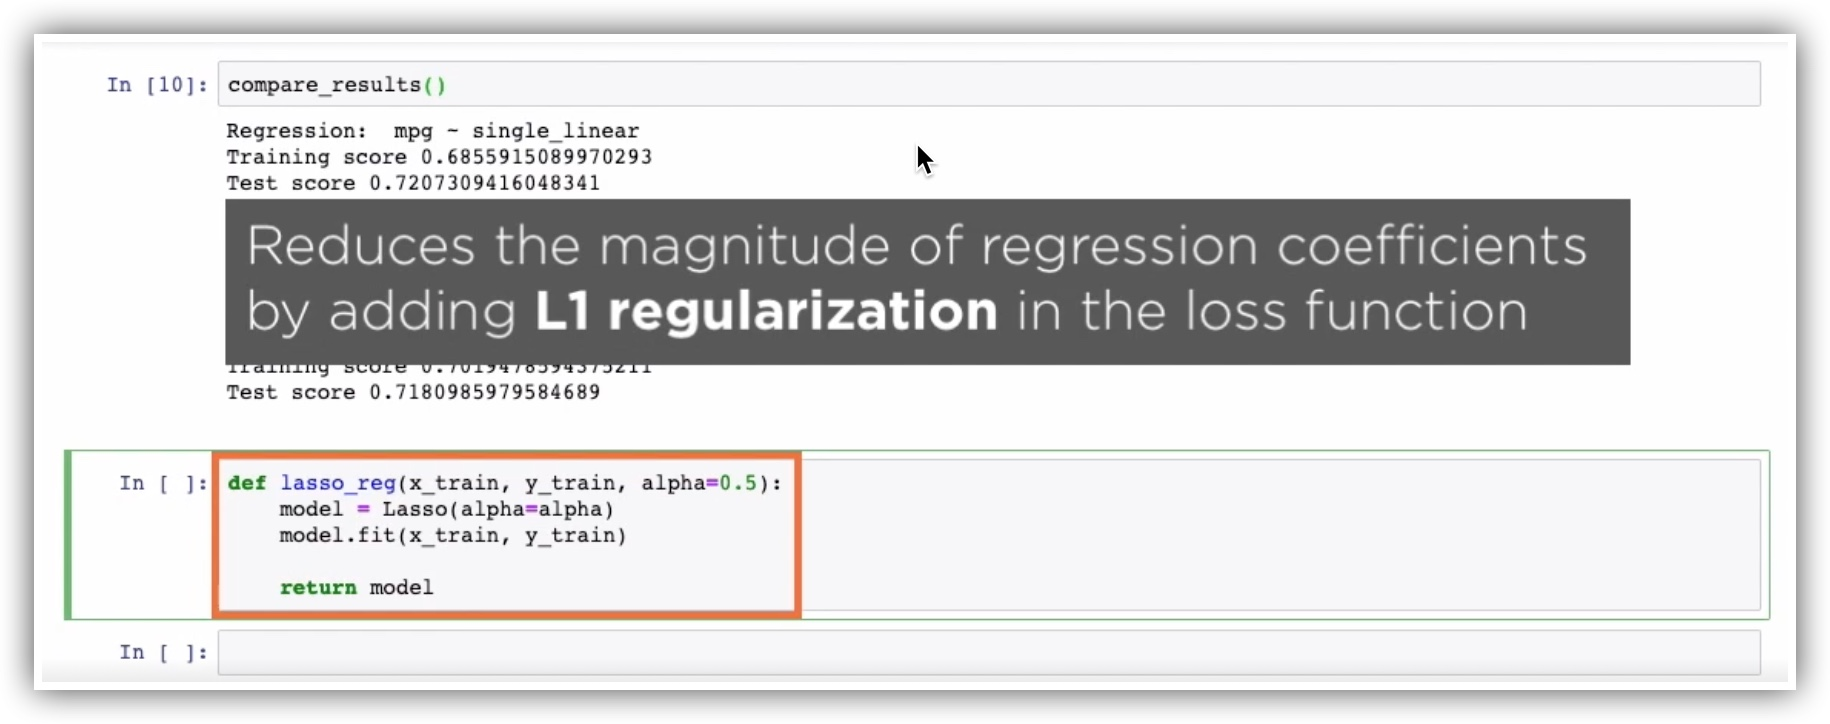

In [42]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-21_20-34-11.jpg')

In [43]:
'''
The lasso regression model uses L-1 regularization to add a penalty to our loss function.

The objective of this penalty function is to reduce the magnitude of regression
coefficients so that we don't end up with an overly complex model.

Regularization is a technique by which we prevent our models from overfitting on the training
data and build more robust solutions.

Define a function called lasso_reg, which takes in the training data, as well as target values,
and within this function instantiate and train a lasso estimator object.

An important hyperparameter that you specify when you build your lasso regression model is alpha.
Alpha is the constant that you use to multiply the L-1 regularization term.

The default value for alpha is set to 1, and higher values of alpha imply more regularization.

If you set alpha to 0, this completely eliminates the L-1 penalty term, which means
Lasso regression defaults to ordinary linear regression, least squares regression.

'''

def lasso_reg(x_train,y_train,alpha=0.5):
    model=Lasso(alpha=alpha)
    model.fit(x_train,y_train)

    return model

Training_score :  0.7000490393629422
Test_score :  0.715147174572117


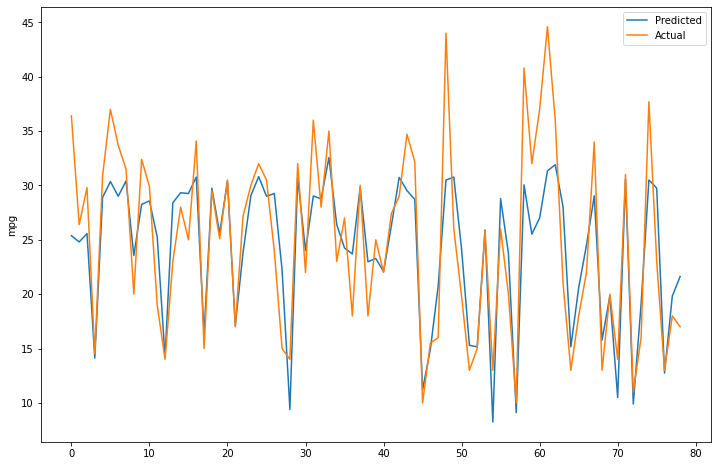

In [44]:
'''
 Let's build and train a lasso regression model by calling the build_model function.
 This is a kitchen sink regression, as you can see, I've passed in all 5 features here.

 We've seen just a little bit earlier that kitchen sink models with linear regression
 don't really perform well, but if you take a look at the training and test
 R squares for lasso regression, you'll find something interesting.

 You'll find that the model performs better on the test data with a test score of
 almost 73%. Lasso regression models are regularized.

  The penalty that we've imposed, the L-1 penalty, force model coefficients to be smaller
  in magnitude. This results in a simpler and more robust model, which performs well on test data.

  So if you're performing kitchen sink regression because you don't know which features in
  your data are significant, it's better to use a regularized model.
'''

result_dict ['mpg - kitchen_sink_lasso'] =build_model(lasso_reg,
                                                       'mpg',
                                                       ['cylinders',
                                                        'displacement',
                                                        'horsepower',
                                                        'weight',
                                                        'acceleration'],
                                                       automobile_df,
                                                       show_plot_Y=True)

In [45]:

'''
Let's quickly call the compare_results function here in order to see all of the training and test
scores in one place.

You can see that the kitchen sink linear regression didn't really perform as well as the
kitchen sink lasso regression.

The R square for test data was almost 69% for our regularized model, whereas it was just
around 67% for our non-regularized linear regression model.
'''
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6886465574759385
Test score 0.7022214608274017

Regression:  mpg - kitchen_sink_linear
Training score 0.7118879455162679
Test score 0.6875259383256004

Regression:  mpg - parsimonious_linear
Training score 0.7044402283383003
Test score 0.7127802587822276

Regression:  mpg - kitchen_sink_lasso
Training score 0.7000490393629422
Test score 0.715147174572117



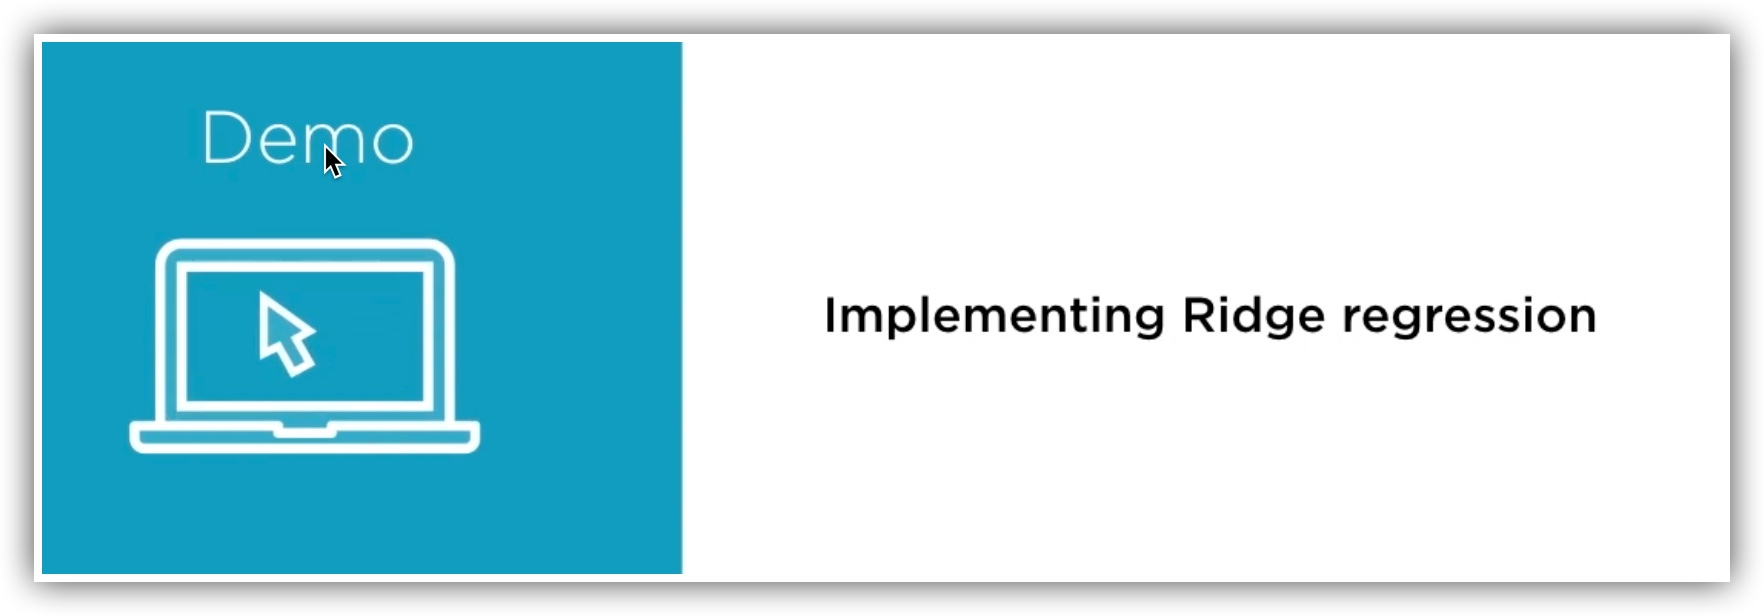

In [46]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-21_20-59-34.jpg')

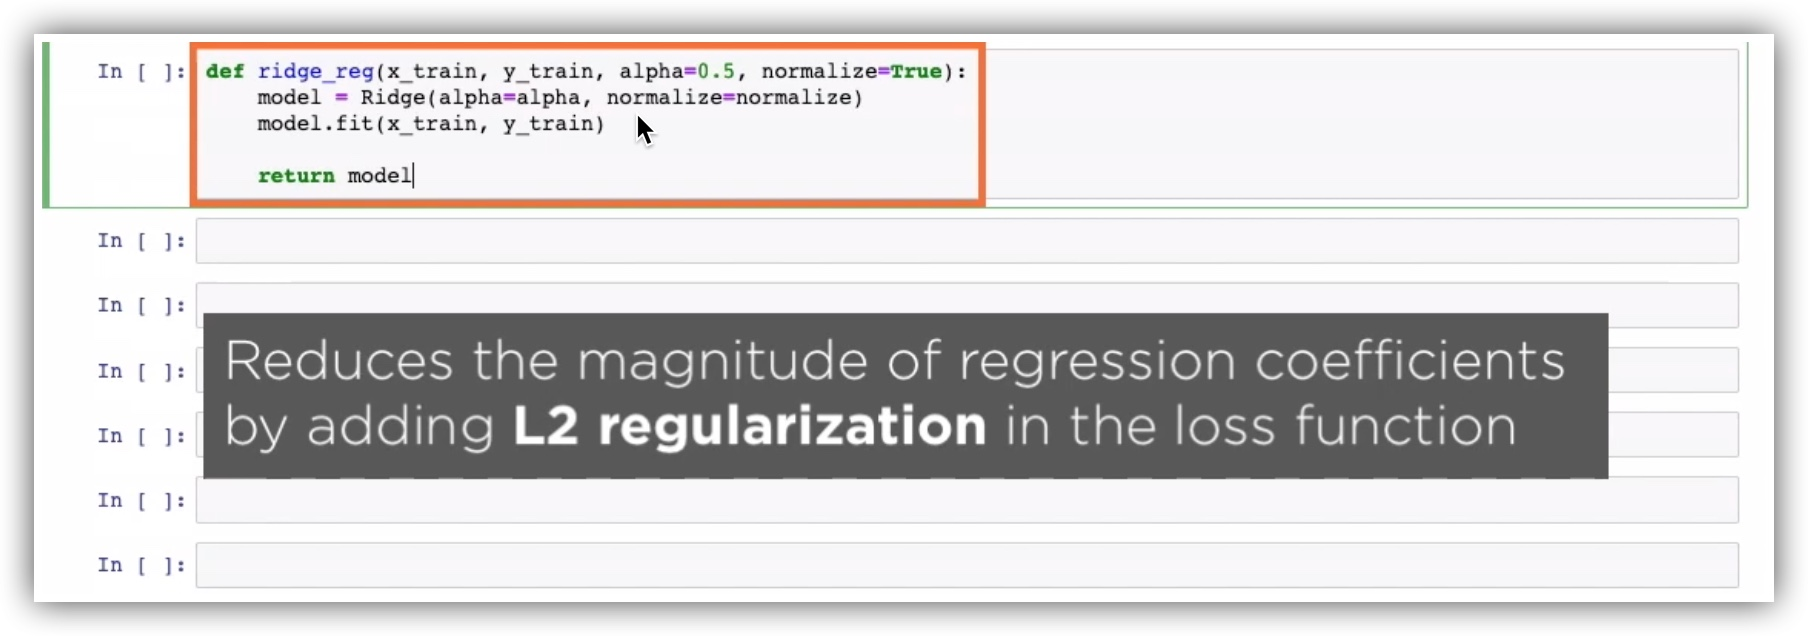

In [47]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-21_21-03-33.jpg')

In [48]:
'''
The ridge regression model is another one that imposes a penalty on an overly complex
model by using regularization.

As we've studied here, ridge regression works exactly like lasso regression, it reduces the
magnitude of regression coefficients by adding L-2 regularization in the loss function.

The L-2 regularization term is the L-2 Norm of the coefficients, which is the sum of the
squares of the coefficients which we use to add as a penalty.

Once again, the alpha parameter here is used to determine the strength of the regularization.
larger values imply stronger or greater regularization.
'''

def ridge_reg(x_train,y_train,alpha=0.5,normalize=True):
    model=Ridge(alpha=alpha,normalize=normalize)
    model.fit(x_train,y_train)

    return model

Training_score :  0.6861630528478846
Test_score :  0.6996778757024829


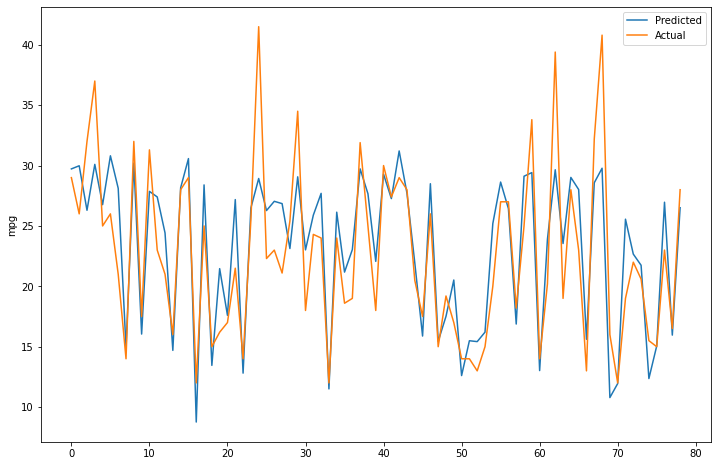

In [49]:
'''
This should be a positive floating point value, larger values imply stronger or greater
regularization.

Once again, because this is a regularized regression model,we'll perform kitchen sink ridge regression.
We'll throw in all features here and see how kitchen sink regression performs using the
ridge regularized model.

And you can see here from the training R square and the test R square that this particular
model didn't really perform well for this dataset.
'''

result_dict ['mpg - kitchen_sink_Ridge'] =build_model(ridge_reg,
                                                      'mpg',
                                                      ['cylinders',
                                                       'displacement',
                                                       'horsepower',
                                                       'weight',
                                                       'acceleration'],
                                                      automobile_df,
                                                      show_plot_Y=True)

In [50]:
'''
For this particular dataset, the lasso model regularized using L-1 Norm performed better than
the ridge regression model.

Remember that this in no way implies that in absolute terms one regression model is
better than the other, it depends on your dataset, it depends on other model parameters,
which we haven't really tweaked here.

Both lasso and ridge are regularized models, which impose a penalty on more complex models or
higher value of coefficients.

The penalty that they impose whether it's the L-1 Norm or the L-2 Norm of coefficients
is what is different.
'''
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6886465574759385
Test score 0.7022214608274017

Regression:  mpg - kitchen_sink_linear
Training score 0.7118879455162679
Test score 0.6875259383256004

Regression:  mpg - parsimonious_linear
Training score 0.7044402283383003
Test score 0.7127802587822276

Regression:  mpg - kitchen_sink_lasso
Training score 0.7000490393629422
Test score 0.715147174572117

Regression:  mpg - kitchen_sink_Ridge
Training score 0.6861630528478846
Test score 0.6996778757024829



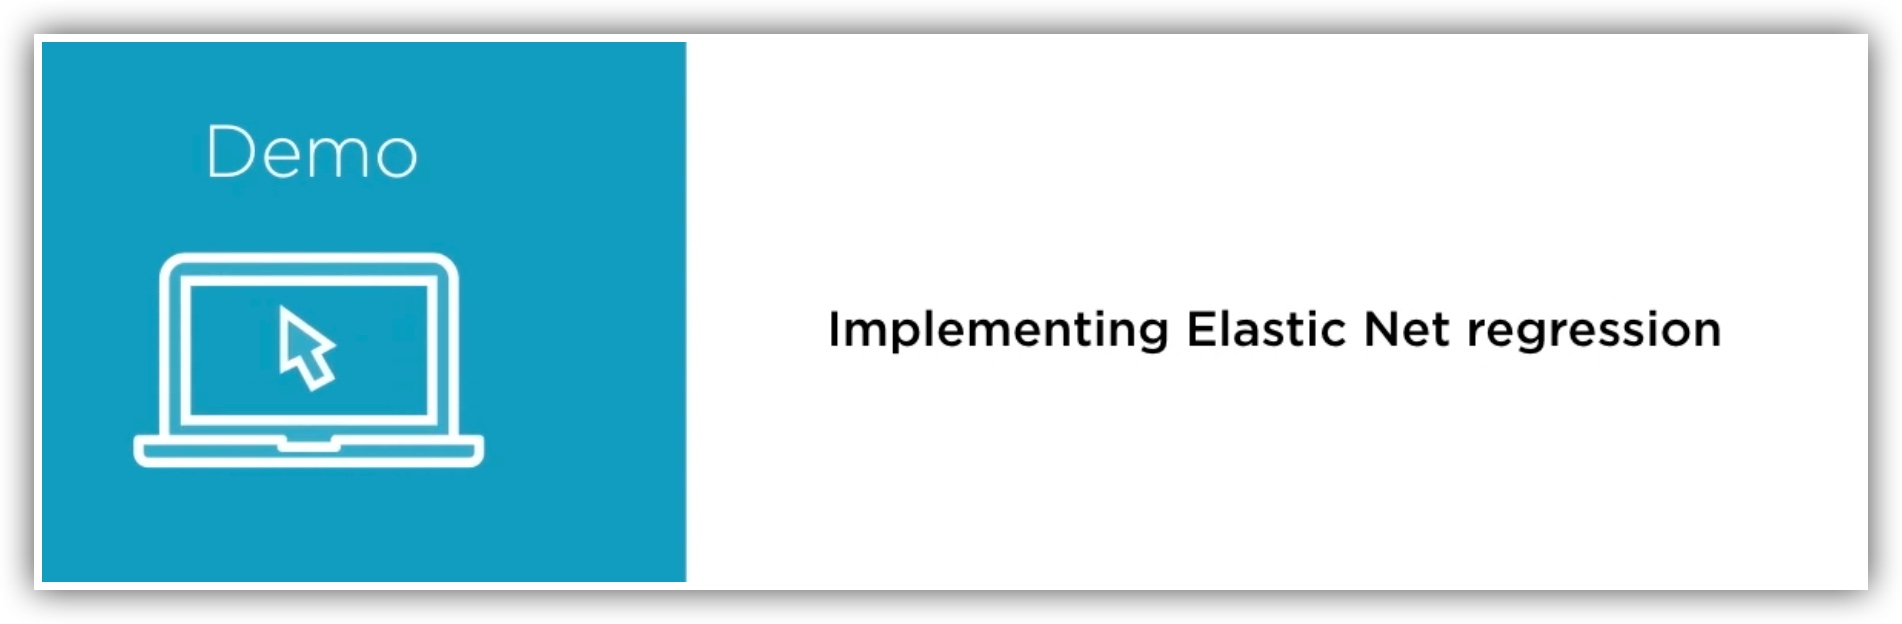

In [51]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-21_21-12-47.jpg')

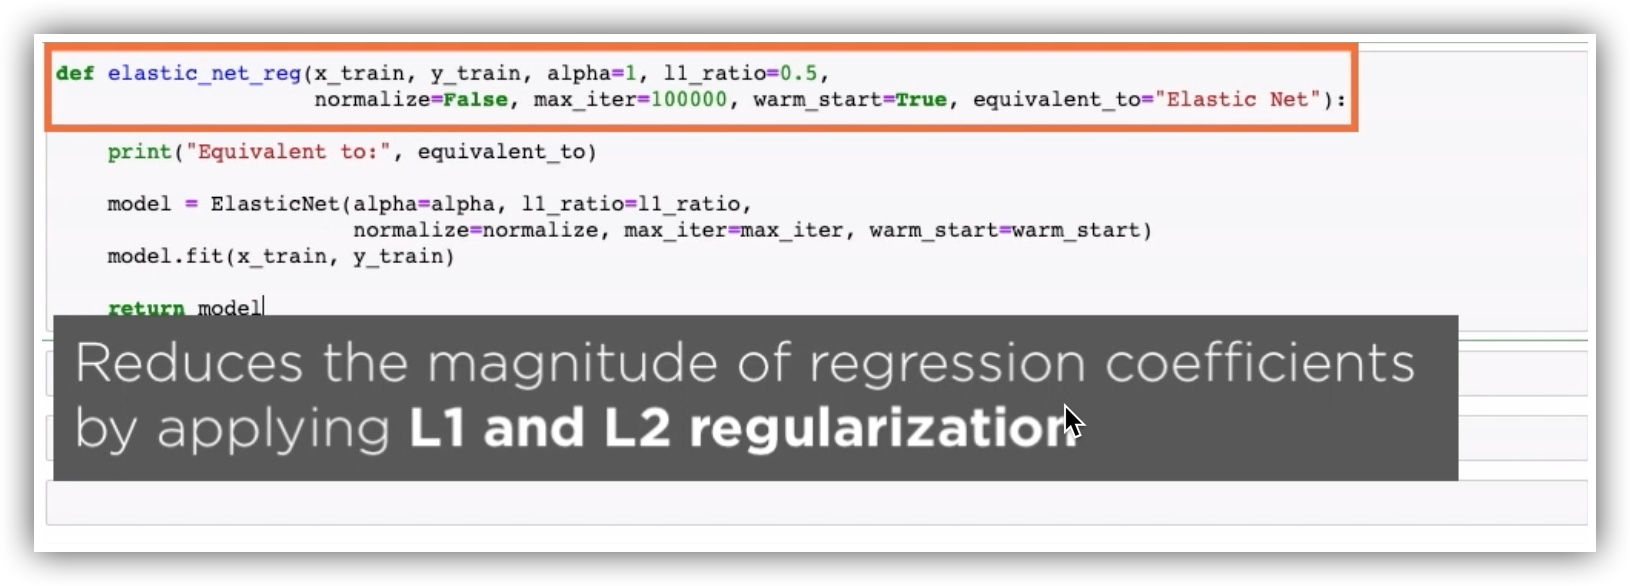

In [52]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-21_21-52-11.jpg')

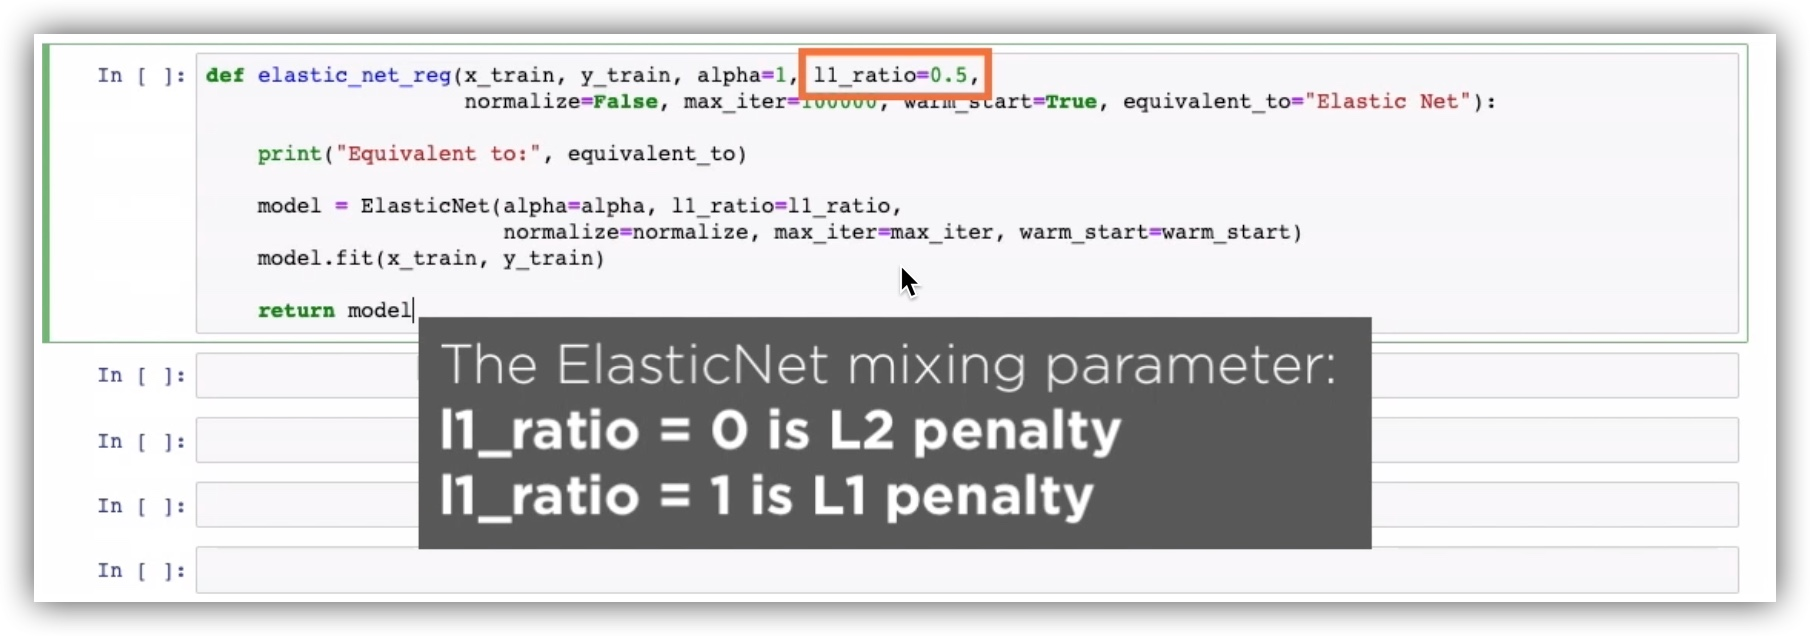

In [53]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-21_21-55-31.jpg')

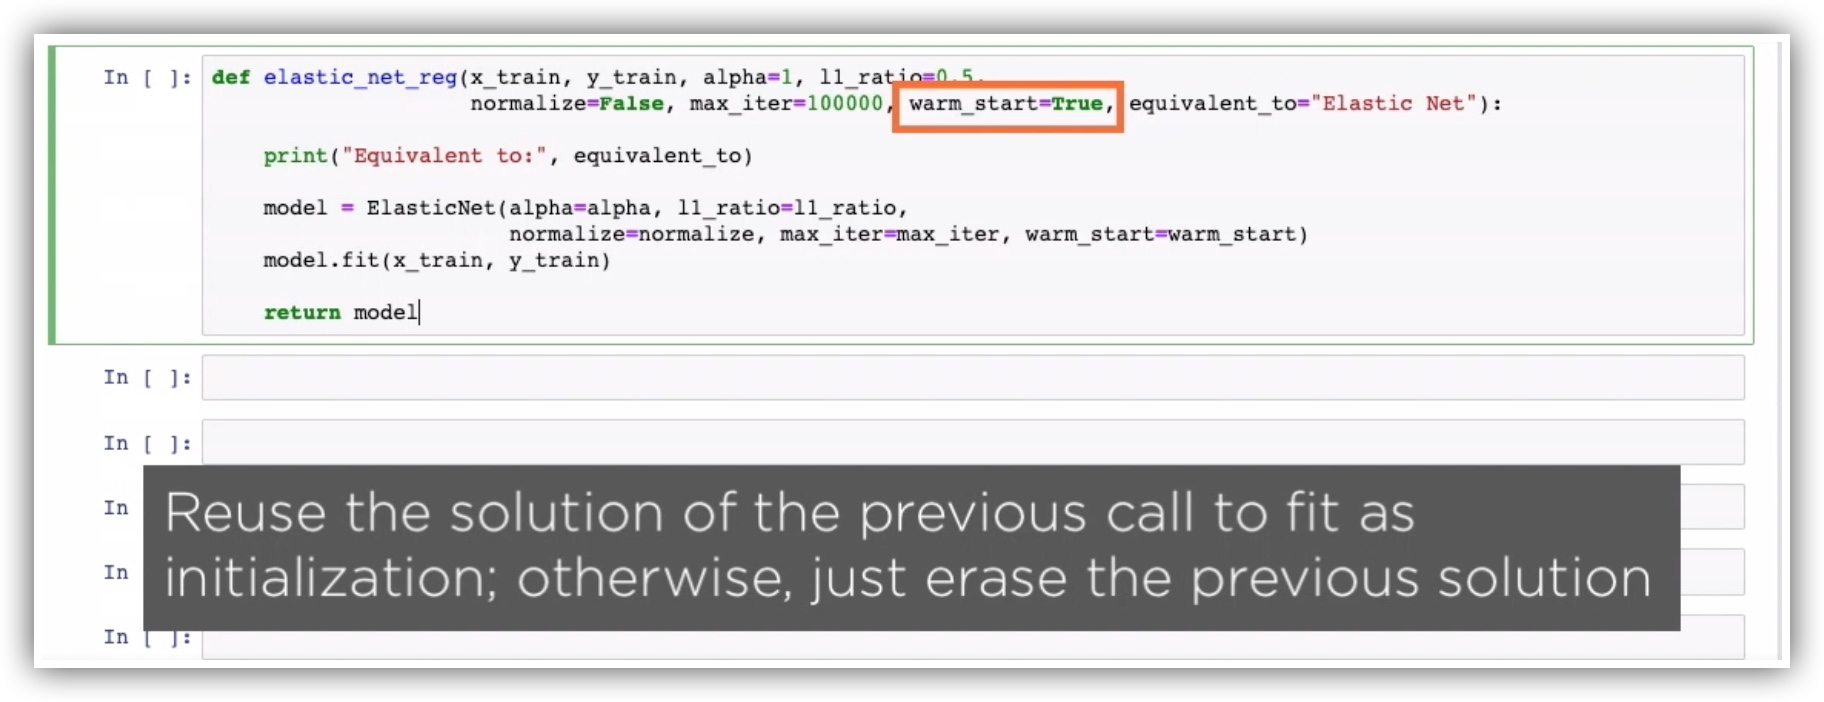

In [54]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-21_22-03-53.jpg')

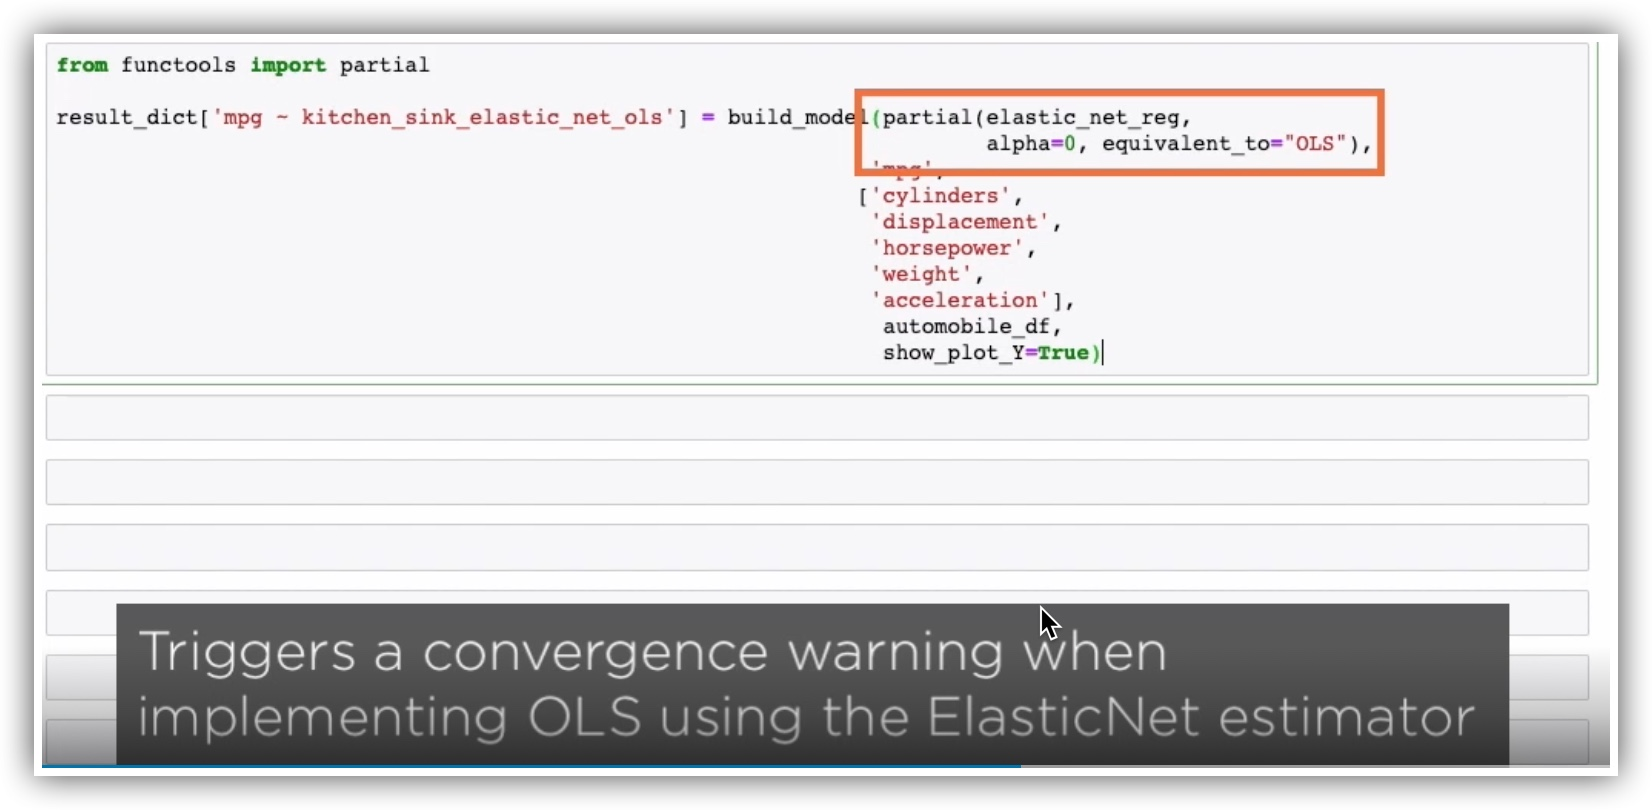

In [57]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/LinerRegression/Images/2021-10-21_22-09-11.jpg')

In [56]:
'''
We'd spoken earlier about the fact that the lasso and ridge regressions were essentially
the same except that they imposed different penalties in their loss function.

The lasso regression model uses the L-1 Norm of coefficients as its penalty function,
the ridge regression model uses the L-2 Norm.

And the elastic net regression model combines both lasso and ridge regression.

 The elastic net model that we're going to implement here in this demo reduces the
 magnitude of regression coefficients by applying both L-1, as well as L-2 regularization.

 In what combination you want to combine L-1, as well as L-2 regularization is up to you,
 it's a parameter you can tweak.

 Let's study some of the parameters that we have here that go into our elastic net model.

:param alpha:

  The first is the alpha parameter that determines the strength of the regularization.
  Alpha is a constant that you use to multiply the penalty terms in your loss function;
  the default value for alpha is 1.

:param l1_ratio:

  The l1_ratio is what is called the elastic net mixing parameter. This is the ratio that you
  tweak in order to determine in what combination you want to apply
  L-1 regularization and L-2 regularization.

  If L-1 ratio is equal to 0, that is completely an L-2 penalty.
  An L-1 ratio of 0 implies ridge regression where you use the L-2 Norm of your coefficients
  as the penalty function.

  An l1_ratio of 1 swings to the other end, that is lasso regression where you use the
  L-1 Norm of your coefficients as the penalty function.

  We've chosen an l1_ratio of 0.5 here to get a mix of L-1, as well as L-2 regularization.

:param normalize:
:param max_iter:

  We set normalize to False and run this model for a maximum number of 100,000 iterations.
  When I worked on this particular dataset, I found that 100,000 iterations gave me decent results.

 When you're working with data in the real world with thousands, maybe millions of records,
 you should normalize your data, but for this toy dataset you'll find that even with
 normalized False, we do just fine.

:param warm_start:
 warm_start is equal to True. If you want your model to have a warm start, that is if you
 want your model to reuse the solution of the previous call made to fit this model
 as the initialization for the next step, you'll set warm_start to True.

 If you want to erase all previous solutions and start afresh, you'll set warm_start to False.

 You'll find that the number of different models in scikit-learn's library accept the
 warm_start parameter.

:param equivalent_to:
 The equivalent_to parameter is something that I'm going to pass in in order to understand
 what this elastic net model is equivalent to.
 This is something that we explicitly pass in when we invoke this function.

 We first print out what this model is equivalent to, then instantiate the
 ElasticNet regressor with the parameters that we passed in and call fit on the model
 to start training.
'''

def elastic_net_reg(x_train,y_train,alpha=1,
                    l1_ratio=0.5,
                    normalize=False,
                    max_iter=100000,
                    warm_start=True,
                    equivalent_to="Elastic_net"):

    print("Equivalent_To : ",equivalent_to)
    model=ElasticNet(alpha=alpha,
                     l1_ratio=l1_ratio,
                     max_iter=max_iter,
                     normalize=normalize,
                     warm_start=warm_start)
    model.fit(x_train,y_train)

    return model

Equivalent_To :  OLS
Training_score :  0.7052679126690662
Test_score :  0.7101941614721065


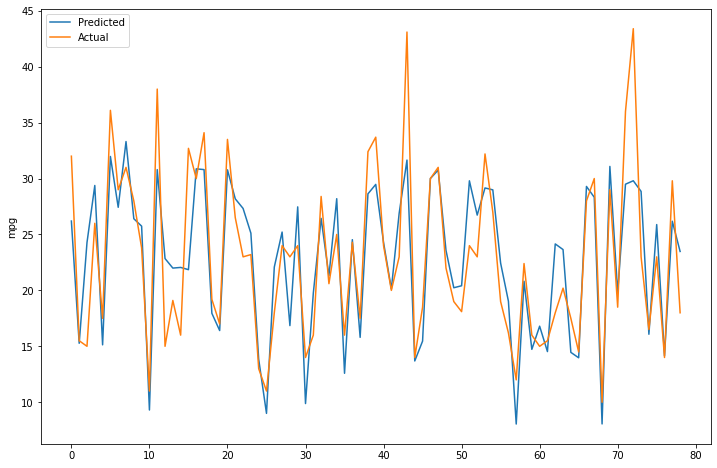

In [63]:
'''
Now in order to tweak the value of the parameters that I pass into my regression function,
I'm going to use this partial function available in Python.

This allows me to partially specify the parameters for a particular function.

Now I'm going to build and train an elastic net model and I'm going to set the model parameter
such that it performs ordinary least squares regression.

Observe a partial specification of the parameters to the elastic net regression function.
When you set alpha to 0, it means that no penalty will be imposed while training our model.
This is equivalent to simple linear ordinary least squares regression.

Now, the way elastic net is implemented in scikit-learn's library, this will trigger a
convergence warning when you try to implement OLS using the ElasticNet estimator.
If you want to perform OLS, use the LinearRegression estimator object.

this is a kitchen sink elastic net regression, the equivalent of OLS. We get a training score
and a test score
'''
from functools import partial
## This generates a warning which says will not converge
result_dict['mpg ~ kitchen_sink_elastic_net_ols'] = build_model(partial(elastic_net_reg,
                                                                        alpha=0, equivalent_to="OLS"),
                                                                'mpg',
                                                                ['cylinders',
                                                                 'displacement',
                                                                 'horsepower',
                                                                 'weight',
                                                                 'acceleration'],
                                                                automobile_df,
                                                                show_plot_Y=True)

Equivalent_To :  Lasso
Training_score :  0.7041687963668197
Test_score :  0.7085361635104572


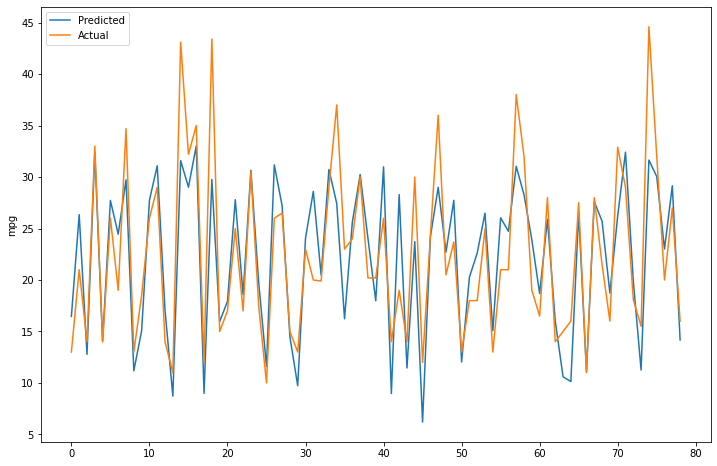

In [64]:

'''
Let's run elastic net regression once again, but this time we specify l1_ratio =1 to 1;
this is the equivalent of lasso regression.

The multiplier for our penalty terms alpha is set to 1. This is a regularized model,
the equivalent of Lasso regression,
I'm going to pass in all of my features for kitchen sink regression.

And just like our lasso regression model did well earlier, the elastic net model
with l1_ratio equal to 1 also does well.

The R square score on the test data is 72%.
'''
result_dict['mpg ~ kitchen_sink_elastic_net_lasso'] = build_model(partial(elastic_net_reg,
                                                                        alpha=1,
                                                                        l1_ratio=1,
                                                                        equivalent_to="Lasso"),
                                                                'mpg',
                                                                ['cylinders',
                                                                 'displacement',
                                                                 'horsepower',
                                                                 'weight',
                                                                 'acceleration'],
                                                                automobile_df,
                                                                show_plot_Y=True)

Equivalent_To :  Ridge
Training_score :  0.7042284816475235
Test_score :  0.7168739193954208


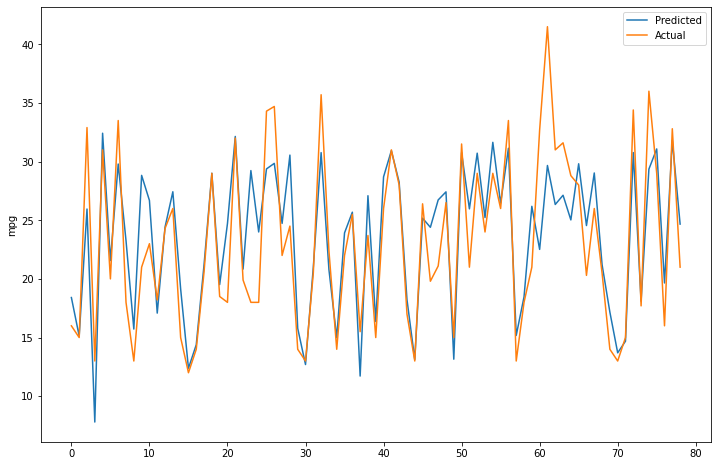

In [65]:
'''
Let's run elastic net regression once again, this time we set the l1_ratio to be = 0, so
elastic net performs the equivalent of ridge regression with just L-2 regularization.

Once again, this is a kitchen sink regression with all of our features,
and you can see that ridge regression also performs reasonably well on our dataset.
'''
result_dict['mpg ~ kitchen_sink_elastic_net_ridge'] = build_model(partial(elastic_net_reg,
                                                                        alpha=1,
                                                                        l1_ratio=0,
                                                                        equivalent_to="Ridge"),
                                                                'mpg',
                                                                ['cylinders',
                                                                 'displacement',
                                                                 'horsepower',
                                                                 'weight',
                                                                 'acceleration'],
                                                                automobile_df,
                                                                show_plot_Y=True)

Equivalent_To :  Elastic_Net
Training_score :  0.7005758974173566
Test_score :  0.7206925868906184


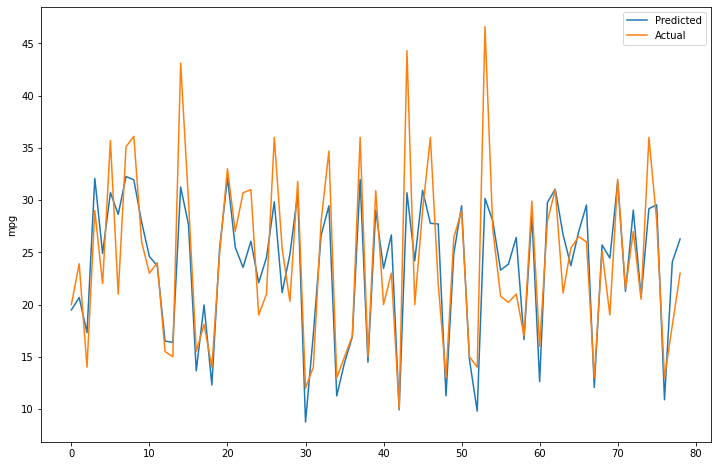

In [66]:
'''
But if you're using elastic net as your regression model, what you really want is the ability
to control how much L-1 regularization and how much L-2 regularization should be applied
to your model.

Here I specify a ratio of 0.5 for both kinds of regularization, and here is what
my elastic net scores look like.

Both training and test scores are high, test scores are higher than the training score,
indicating that this is a fairly robust model.
'''

result_dict['mpg ~ kitchen_sink_elastic_net'] = build_model(partial(elastic_net_reg,
                                                                        alpha=1,
                                                                        l1_ratio=0.5,
                                                                        equivalent_to="Elastic_Net"),
                                                                'mpg',
                                                                ['cylinders',
                                                                 'displacement',
                                                                 'horsepower',
                                                                 'weight',
                                                                 'acceleration'],
                                                                automobile_df,
                                                                show_plot_Y=True)

In [67]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6886465574759385
Test score 0.7022214608274017

Regression:  mpg - kitchen_sink_linear
Training score 0.7118879455162679
Test score 0.6875259383256004

Regression:  mpg - parsimonious_linear
Training score 0.7044402283383003
Test score 0.7127802587822276

Regression:  mpg - kitchen_sink_lasso
Training score 0.7000490393629422
Test score 0.715147174572117

Regression:  mpg - kitchen_sink_Ridge
Training score 0.6861630528478846
Test score 0.6996778757024829

Regression:  mpg ~ kitchen_sink_elastic_net_ols
Training score 0.7052679126690662
Test score 0.7101941614721065

Regression:  mpg ~ kitchen_sink_elastic_net_lasso
Training score 0.7041687963668197
Test score 0.7085361635104572

Regression:  mpg ~ kitchen_sink_elastic_net_ridge
Training score 0.7042284816475235
Test score 0.7168739193954208

Regression:  mpg ~ kitchen_sink_elastic_net
Training score 0.7005758974173566
Test score 0.7206925868906184

